<a href="https://colab.research.google.com/github/preetikhullbe/sms-spam-messages-detection-/blob/main/sms_Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read file
df= pd.read_csv("/content/drive/MyDrive/spam.csv",encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#checking for null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
#size of dataset
df.shape

(5572, 5)

In [5]:
#except v1 and v2 columns most of columns don't have valid details and contain null values
#removing these columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [6]:
#top 5 records
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#bottom 5 records
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
#reanme column names
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.columns

Index(['target', 'text'], dtype='object')

In [10]:
#importing liberary
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
#encoding target column
df['target']=encoder.fit_transform(df['target'])
df.head()  #0 for ham and 1 for spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#duplicate records
df.duplicated().sum()

403

In [14]:
#droping duplicates
df=df.drop_duplicates(keep='first')

## **EDA**



In [15]:
#EDA
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

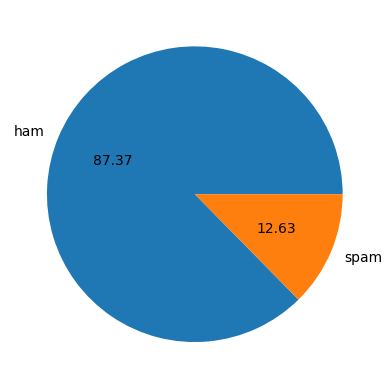

In [16]:
#pie chart to know value_counts
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
#importing nlp library for texual data
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
#number of characters in texts
df['num_char']=df['text'].apply(len)
# number of words in texts
df['num_words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
# number of sentences in texts
df['num_sentences']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   target         5169 non-null   int64 
 1   text           5169 non-null   object
 2   num_char       5169 non-null   int64 
 3   num_words      5169 non-null   int64 
 4   num_sentences  5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


In [21]:
df.describe()

,target,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [22]:
# ham messages summary
df[df['target']==0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# spam messages summary
df[df['target']==1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

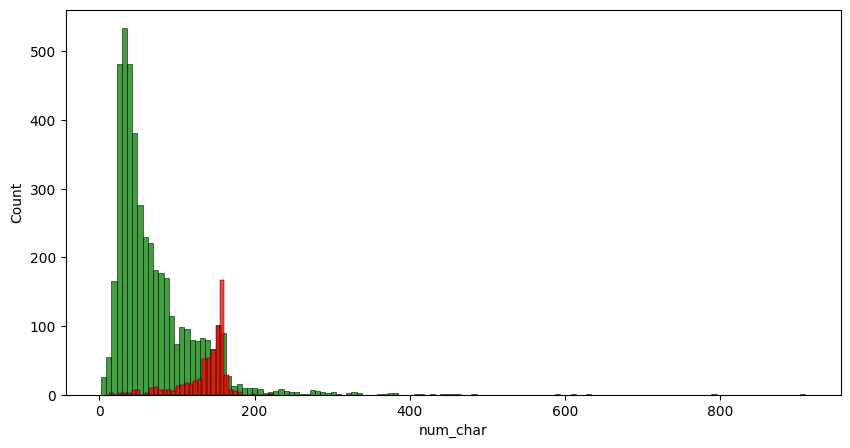

In [25]:
#plotting histogram to check distribution of both spam and ham messages based on number of character
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_char'],color='green')
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

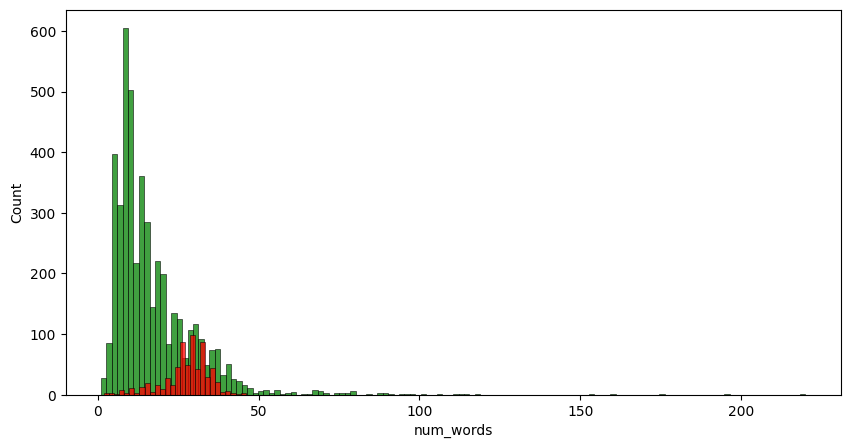

In [26]:
#plotting histogram to check distribution of both spam and ham messages based on number of words
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='red')

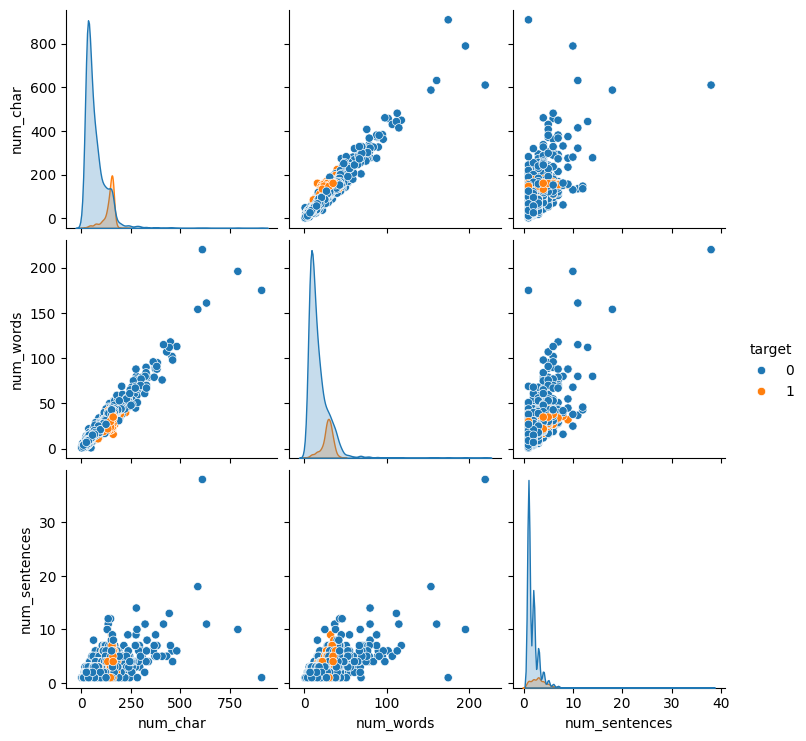

In [28]:
#relation between columns
sns.pairplot(df,hue='target')

<Axes: >

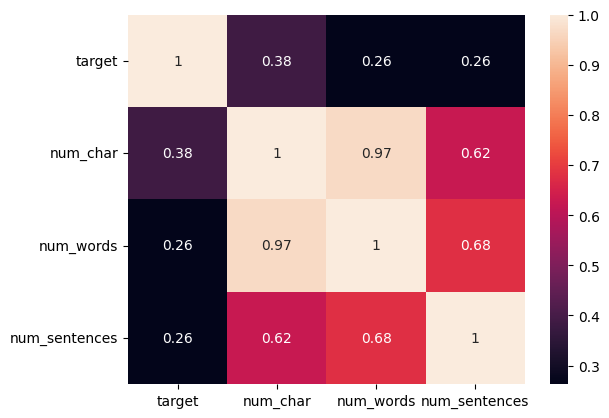

In [29]:
#checking correlation
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [30]:
#stemming process
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [36]:
import nltk
from nltk.corpus import stopwords
import string

# Make sure to download the stopwords if you haven't already
nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    text = nltk.word_tokenize(text)

    y = []

    # Remove non-alphanumeric tokens
    for i in text:
        if i.isalnum():
            y.append(i)

    # Filter out stopwords and punctuation
    filtered_words = []
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation:
            filtered_words.append(i)

    # Stem the words
    stemmed_words = []
    for i in filtered_words:
        stemmed_words.append(ps.stem(i))

    return " ".join(filtered_words)

# Example usage:
text = "Hello! This is an example sentence, showing off the stop words filtration."
print(transform_text(text))

hello example sentence showing stop words filtration


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [37]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymore tonight k cried enough today'

In [38]:
#new column to store transformed text
df['transformed_text']=df['text'].apply(transform_text)

In [39]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


In [43]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=5,background_color='white')

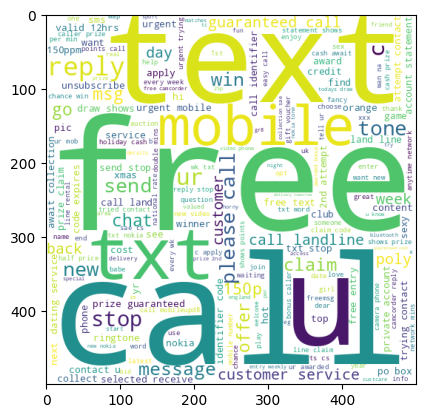

In [44]:
#plot to show top words in ham
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

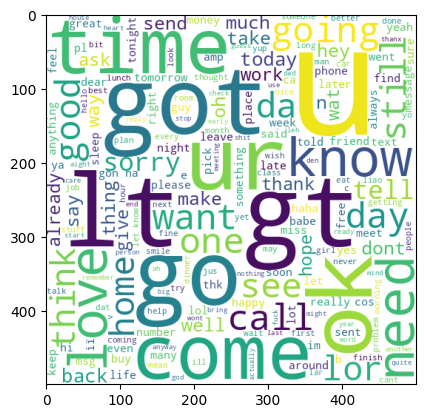

In [45]:
#plot to show top words in spam
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [50]:
#storing words of spam sms
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [51]:
len(spam_corpus)

9939

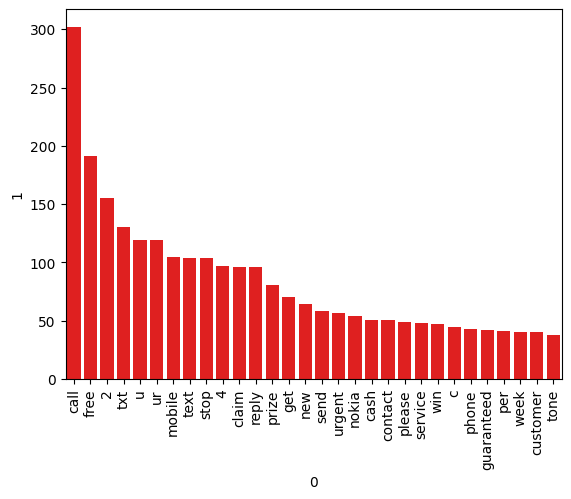

In [66]:
#most common words in Spam messages
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],color='red')
plt.xticks(rotation='vertical')
plt.show()

In [59]:
#storing words of ham sms
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [60]:
len(ham_corpus)

35404

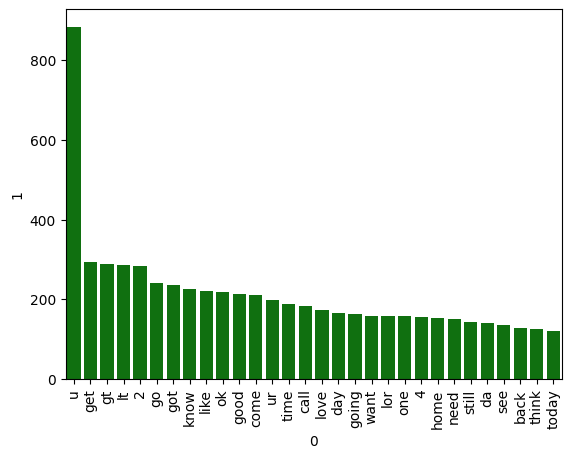

In [67]:
#most common words in Not Spam messages
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],color='green')
plt.xticks(rotation='vertical')
plt.show()